# PVSC 2022 Perovskite ReMFG vs Recycling: a mass and energy analysis

This journal documents the analysis conducted for PVSC 2022 Mirletz et al conference presentation. It constitutes an initial demonstration of the energy flows of the PV ICE tool.

The comparison will be between a 100% remanfactured module and a 100% recycled module.

In [1]:
import os
from pathlib import Path
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP'/'PVSC2022-Eflows')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_ICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

Your simulation will be stored in C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\PVSC2022-Eflows


In [2]:
PV_ICE.__version__

'v0.2.0+154.g6d4f676.dirty'

## Add Scenarios and Materials

We wil create 3 scenarios:
1. baseline linear economy for glass-glass module
2. 100% reMFG the glass
3. 100% recycle the glass

These three scenarios will have the following assumptions:

0. All Scenarios
    - no circularity in MFG scrap
1. Linear economy
    - no reMFG or recycling
2. 100% ReMFG
    - all EoL goes to reMFG, no recycling
    - yields are: 99%
3. 100% Recycle LQ
   - all EoL goes to recycling, mix open and closed-loop
   - yields are: 40%*15%
4. 100% Recycle HQ
   - all EOL goes to recycling closed-loop
   - yields are 99%

In [3]:
cwd=os.getcwd()
print(os.getcwd())

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\tutorials


In [4]:
MATERIALS = ['glass']#,'aluminium_frames','silver','silicon', 'copper', 'encapsulant', 'backsheet']
MATERIAL = MATERIALS[0]
#moduleFile_recycle = r'..\..\baselines\perovskite_modules_US_recycle.csv'
#moduleFile_reMFG = r'..\..\baselines\perovskite_modules_US_reMFG.csv'
moduleFile= r'..\..\baselines\perovskite_modules_US_linear.csv'

In [5]:
r1 = PV_ICE.Simulation(name='perovskite_energies', path=testfolder)

scenarios = ['perovskite_linear', 'perovskite_reMFG', 'perovskite_recycle', 'perovskite_recycle_perfect']

for scen in scenarios: 

    r1.createScenario(name=scen, file=moduleFile)
    for mat in range (0, len(MATERIALS)):
        MATERIALBASELINE = r'..\..\baselines\perovskite_material_'+MATERIALS[mat]+'.csv'
        r1.scenario[scen].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)


path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\PVSC2022-Eflows


### Modify the scenarios to match assumptions

In [6]:
r1.scenario['perovskite_linear'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff',
       'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored',
       'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield',
       'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill',
       'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled'],
      dtype='object')

In [7]:
r1.scenario['perovskite_linear'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG3_ReMFG_target',
       'mat_ReMFG_yield', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG'],
      dtype='object')

In [8]:
#linear
r1.modifyScenario('perovskite_linear', 'mod_Repair', 0.0) #this removes all weibull failures from field immediately
r1.modifyScenario('perovskite_linear', 'mod_MerchantTail', 0.0) # this prevents extended use
r1.modifyScenario('perovskite_linear', 'mod_EOL_collection_eff', 0.0) #this sends everytyhing to landfill

r1.scenario['perovskite_linear'].modifyMaterials('glass', 'mat_MFG_scrap_Recycled', 0.0) #send all mfg scrap to landfill


In [9]:
#reMFG
#Module
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_collection_eff', 100.0) #this collects everything
    #path good
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg0_resell', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg1_landfill', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg2_stored', 0.0) #

r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg3_reMFG', 100.0) #send all to remfg
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_reMFG_yield', 100.0) #100% yield of remfg

r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pg4_recycled', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_sp_reMFG_recycle', 0.0) #
    #path bad
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pb1_landfill', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pb2_stored', 0.0) #
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pb3_reMFG', 100.0) #sends all "bad" modules to remfg, uses same yield above
r1.modifyScenario('perovskite_reMFG', 'mod_EOL_pb4_recycled', 0.0) #

#material
r1.scenario['perovskite_reMFG'].modifyMaterials('glass', 'mat_MFG_scrap_Recycled', 0.0) #send mfg scrap to landfill
r1.scenario['perovskite_reMFG'].modifyMaterials('glass', 'mat_PG3_ReMFG_target', 100.0) #send all to remfg
r1.scenario['perovskite_reMFG'].modifyMaterials('glass', 'mat_PG4_Recycling_target', 0.0) #send none to recycle
r1.scenario['perovskite_reMFG'].modifyMaterials('glass', 'mat_ReMFG_yield', 99.0) #already set to 99, in case change


In [10]:
#recycle
#module
r1.modifyScenario('perovskite_recycle', 'mod_EOL_collection_eff', 100.0) #this collects everything
    #path good
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg0_resell', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg1_landfill', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg2_stored', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg3_reMFG', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_reMFG_yield', 0.0) #

r1.modifyScenario('perovskite_recycle', 'mod_EOL_pg4_recycled', 100.0) #send all to recycle
r1.modifyScenario('perovskite_recycle', 'mod_EOL_sp_reMFG_recycle', 0.0) #
    #path bad
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pb1_landfill', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pb2_stored', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pb3_reMFG', 0.0) #
r1.modifyScenario('perovskite_recycle', 'mod_EOL_pb4_recycled', 100.0) #send all to recycle

#material
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_MFG_scrap_Recycled', 100.0) #send all mfg scrap to recycle
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 100.0) #all hq closed-loop
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_PG3_ReMFG_target', 0.0) #send none to remfg
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_PG4_Recycling_target', 100.0) #send all to recycle
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_EOL_RecycledHQ_Reused4MFG', 100.0) #closed-loop
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_EOL_Recycled_into_HQ', 15.0) #HQ??
r1.scenario['perovskite_recycle'].modifyMaterials('glass', 'mat_Recycling_yield', 40.0) #yield??


In [11]:
#recycle_perfect
#module
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_collection_eff', 100.0) #this collects everything
    #path good
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pg0_resell', 0.0) #
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pg1_landfill', 0.0) #
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pg2_stored', 0.0) #
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pg3_reMFG', 0.0) #
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_reMFG_yield', 0.0) #

r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pg4_recycled', 100.0) #send all to recycle
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_sp_reMFG_recycle', 0.0) #
    #path bad
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pb1_landfill', 0.0) #
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pb2_stored', 0.0) #
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pb3_reMFG', 0.0) #
r1.modifyScenario('perovskite_recycle_perfect', 'mod_EOL_pb4_recycled', 100.0) #send all to recycle

#material
r1.scenario['perovskite_recycle_perfect'].modifyMaterials('glass', 'mat_MFG_scrap_Recycling_eff', 99.0) #send all mfg scrap to recycle
r1.scenario['perovskite_recycle_perfect'].modifyMaterials('glass', 'mat_MFG_scrap_Recycled_into_HQ', 100.0) #send all mfg scrap to recycle
r1.scenario['perovskite_recycle_perfect'].modifyMaterials('glass', 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 100.0) #send all mfg scrap to recycle

r1.scenario['perovskite_recycle_perfect'].modifyMaterials('glass', 'mat_PG3_ReMFG_target', 0.0) #send none to remfg
r1.scenario['perovskite_recycle_perfect'].modifyMaterials('glass', 'mat_PG4_Recycling_target', 100.0) #send all to recycle
r1.scenario['perovskite_recycle_perfect'].modifyMaterials('glass', 'mat_Recycling_yield', 99.0) #yield
r1.scenario['perovskite_recycle_perfect'].modifyMaterials('glass', 'mat_EOL_Recycled_into_HQ', 100.0) #HQ
r1.scenario['perovskite_recycle_perfect'].modifyMaterials('glass', 'mat_EOL_RecycledHQ_Reused4MFG', 100.0) #closed-loop


In [12]:
r1.scenario['perovskite_recycle'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_PG3_ReMFG_target',
       'mat_ReMFG_yield', 'mat_PG4_Recycling_target', 'mat_Recycling_yield',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG'],
      dtype='object')

## Run the Mass Flow Calculations on All Scenarios and Materials

In [13]:
r1.calculateMassFlow()

Working on Scenario:  perovskite_linear
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  perovskite_reMFG
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  perovskite_recycle
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  perovskite_recycle_perfect
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


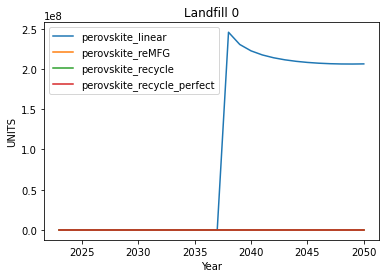

In [14]:
r1.plotScenariosComparison('Landfill_0')

In [15]:
mass_agg_yearly, mass_agg_sums = r1.aggregateResults()
mass_agg_yearly.to_csv('perovskite_mass_yearly.csv')
mass_agg_sums.to_csv('perovskite_mass_cumulatives.csv')

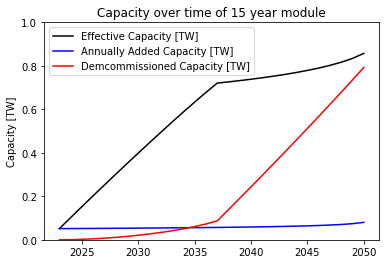

In [16]:
plt.plot(mass_agg_yearly['ActiveCapacity_perovskite_energies_perovskite_linear_[MW]']/1e6,
        label='Effective Capacity [TW]', color='black')
plt.plot(mass_agg_yearly['newInstalledCapacity_perovskite_energies_perovskite_linear_[MW]']/1e6,
        label='Annually Added Capacity [TW]', color='blue')
plt.plot(mass_agg_yearly['DecommisionedCapacity_perovskite_energies_perovskite_recycle_[MW]']/1e6,
        label='Demcommissioned Capacity [TW]', color='red')
plt.title('Capacity over time of 15 year module')
plt.ylabel('Capacity [TW]')
plt.ylim(0.0,1.0)
plt.legend()

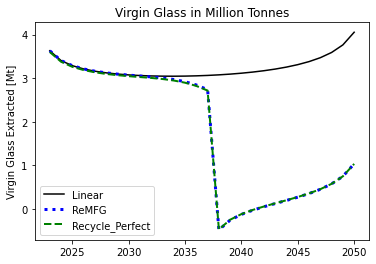

In [17]:
plt.plot(mass_agg_yearly['VirginStock_glass_perovskite_energies_perovskite_linear_[Tonnes]']/1e6,
        label='Linear', color='black')
plt.plot(mass_agg_yearly['VirginStock_glass_perovskite_energies_perovskite_reMFG_[Tonnes]']/1e6,
        label='ReMFG', color='blue', linestyle='dotted', lw=3)
plt.plot(mass_agg_yearly['VirginStock_glass_perovskite_energies_perovskite_recycle_perfect_[Tonnes]']/1e6,
        label='Recycle_Perfect', color='green', linestyle='dashed', lw=2)
plt.title('Virgin Glass in Million Tonnes')
plt.ylabel('Virgin Glass Extracted [Mt]')
#plt.ylim(0.0,1.0)
plt.legend()

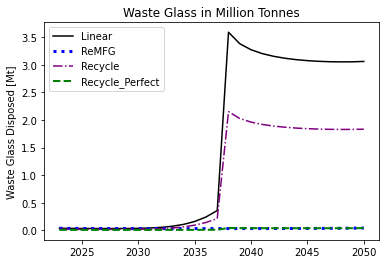

In [18]:
plt.plot(mass_agg_yearly['WasteAll_glass_perovskite_energies_perovskite_linear_[Tonnes]']/1e6,
        label='Linear', color='black')
plt.plot(mass_agg_yearly['WasteAll_glass_perovskite_energies_perovskite_reMFG_[Tonnes]']/1e6,
        label='ReMFG', color='blue', linestyle='dotted', lw=3)
plt.plot(mass_agg_yearly['WasteAll_glass_perovskite_energies_perovskite_recycle_[Tonnes]']/1e6,
        label='Recycle', color='purple', linestyle='-.')
plt.plot(mass_agg_yearly['WasteAll_glass_perovskite_energies_perovskite_recycle_perfect_[Tonnes]']/1e6,
        label='Recycle_Perfect', color='green', linestyle='dashed', lw=2)
plt.title('Waste Glass in Million Tonnes')
plt.ylabel('Waste Glass Disposed [Mt]')
#plt.ylim(0.0,1.0)
plt.legend()

# Energy Flows

First read in the energy files. Point at a path, then use the PV ICE colde to handle the meta data. Energy values for modules are in kWh/m2 and for materials are in kWh/kg. To ensure unit matching, we will divide the input by 1000 to convert kg to g.

In [19]:
matEfile_glass = str(Path().resolve().parent.parent / 'baselines'/'perovskite_energy_material_glass.csv')

modEfile = str(Path().resolve().parent.parent / 'baselines'/'perovskite_energy_modules.csv')

In [20]:
# Material energy file in Wh/g
file = matEfile_glass
csvdata = open(str(file), 'r', encoding="UTF-8")
csvdata = open(str(file), 'r', encoding="UTF-8-sig")
firstline = csvdata.readline()
secondline = csvdata.readline()

head = firstline.rstrip('\n').split(",")
meta = dict(zip(head, secondline.rstrip('\n').split(",")))

data = pd.read_csv(csvdata, names=head)
data.loc[:, data.columns != 'year'] = data.loc[:, data.columns != 'year'].astype(float)

matEfile_glass_simple = data.copy()

In [21]:
#module energy file in Wh/m2
file = modEfile
csvdata = open(str(file), 'r', encoding="UTF-8")
csvdata = open(str(file), 'r', encoding="UTF-8-sig")
firstline = csvdata.readline()
secondline = csvdata.readline()

head = firstline.rstrip('\n').split(",")
meta = dict(zip(head, secondline.rstrip('\n').split(",")))

data = pd.read_csv(csvdata, names=head)
data.loc[:, data.columns != 'year'] = data.loc[:, data.columns != 'year'].astype(float)
modEfile_simple = data.copy()

Now run the energy calculation. Currently this is not a class, just a function that will return a dataframe. Each scenario will need to be run seperately, and read in the perovskite energy files. The results are like the aggregate mass results function in that an annual and a cumulative dataframe are returned.

In [22]:
r1_e_linear, r1_e_linear_cum = r1.calculateEnergyFlow(scenarios='perovskite_linear', materials='glass', modEnergy=modEfile_simple, matEnergy=matEfile_glass_simple)
r1_e_reMFG, r1_e_reMFG_cum = r1.calculateEnergyFlow(scenarios='perovskite_reMFG', materials='glass', modEnergy=modEfile_simple, matEnergy=matEfile_glass_simple)
r1_e_reCYCLE, r1_e_reCYCLE_cum = r1.calculateEnergyFlow(scenarios='perovskite_recycle', materials='glass', modEnergy=modEfile_simple, matEnergy=matEfile_glass_simple)
r1_e_reCYCLE_perfs, r1_e_reCYCLE_perfs_cum = r1.calculateEnergyFlow(scenarios='perovskite_recycle_perfect', materials='glass', modEnergy=modEfile_simple, matEnergy=matEfile_glass_simple)
#note that the cumulative ones sum the two types of recycling together which may not be applicable.

# Energy Analysis

In [23]:
r1_e_linear.index = modEfile_simple['year']
r1_e_reMFG.index = modEfile_simple['year']
r1_e_reCYCLE.index = modEfile_simple['year']
r1_e_reCYCLE_perfs.index = modEfile_simple['year']

In [24]:
r1_e_linear.keys()

Index(['mod_MFG', 'mod_Install', 'mod_OandM', 'mod_Repair', 'mod_Demount',
       'mod_Store', 'mod_Resell_Certify', 'mod_ReMFG_Disassembly',
       'mod_Recycle_Crush', 'mat_extraction', 'mat_MFG_virgin',
       'mat_MFGScrap_LQ', 'mat_MFGScrap_HQ', 'mat_Landfill',
       'mat_EoL_ReMFG_clean', 'mat_Recycled_LQ', 'mat_Recycled_HQ',
       'e_out_annual_[Wh]'],
      dtype='object')

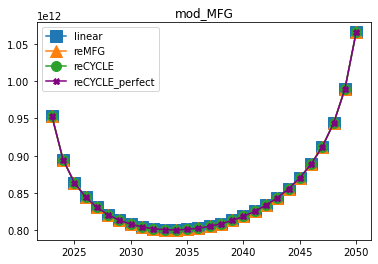

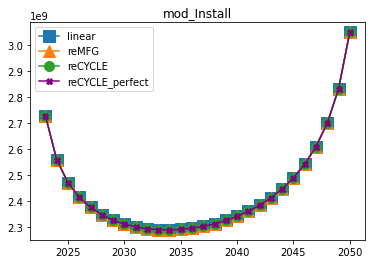

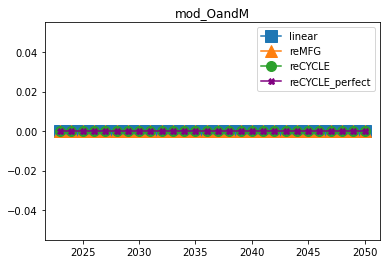

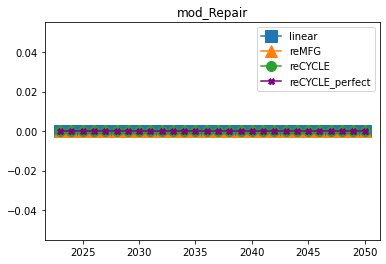

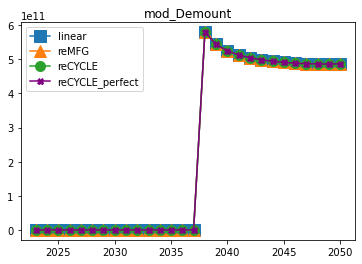

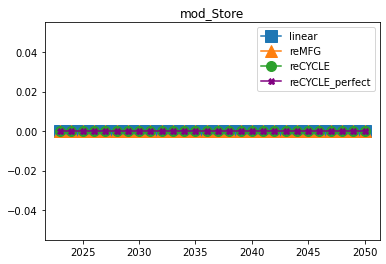

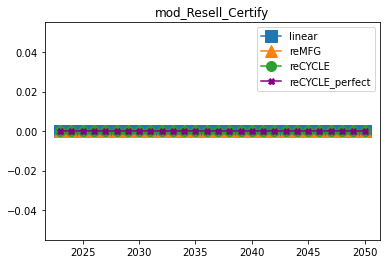

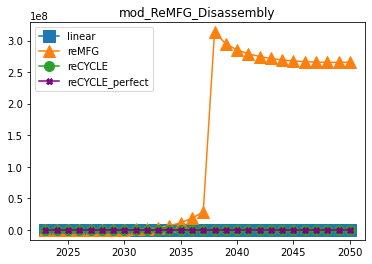

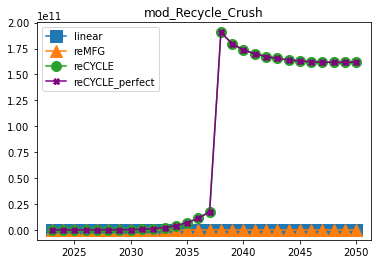

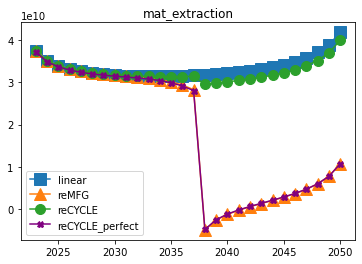

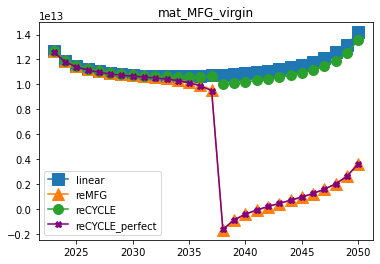

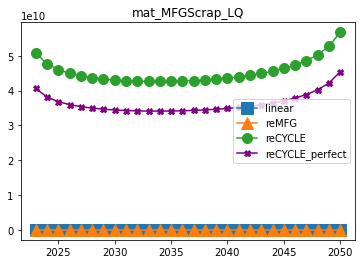

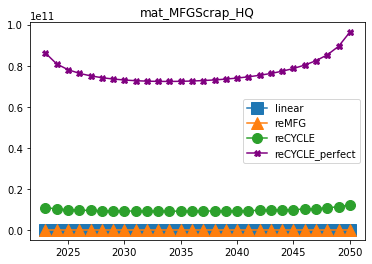

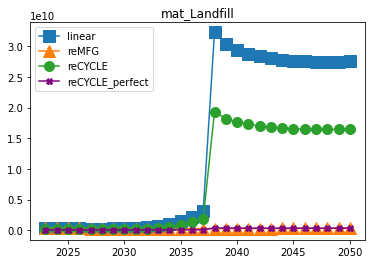

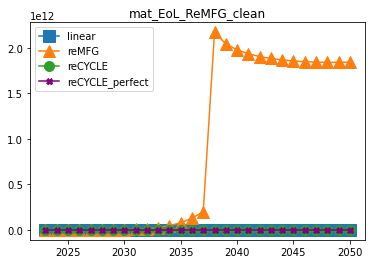

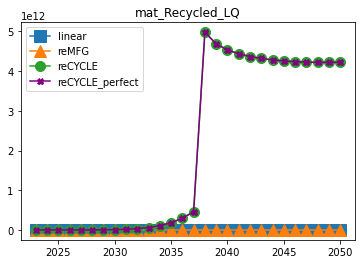

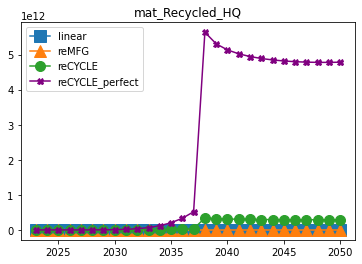

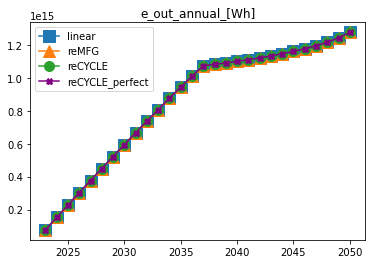

In [25]:
for key in r1_e_linear.keys():
    plt.plot(r1_e_linear.index, r1_e_linear[key], marker='s', ms=12, label='linear')
    plt.plot(r1_e_reMFG.index, r1_e_reMFG[key], marker='^', ms=12, label='reMFG')
    plt.plot(r1_e_reCYCLE.index, r1_e_reCYCLE[key], marker='o',ms=10, label='reCYCLE')
    plt.plot(r1_e_reCYCLE_perfs.index, r1_e_reCYCLE_perfs[key], marker='X', color='purple', label='reCYCLE_perfect')
    plt.legend()
    plt.title(str(key))
    plt.show()

The negative values are a product of the 15 year lifetime, and suddenly providing more material than necessary in a mfging year. Ideally, we would address this through storage for next year offsetting - to be developed. These negative values can be exacerbated by deployment curves.

### E_in

In [26]:
energy_annual = pd.concat([r1_e_linear, r1_e_reMFG, r1_e_reCYCLE, r1_e_reCYCLE_perfs], axis=1, 
                          keys=['perovskite_linear', 'perovskite_reMFG', 'perovskite_recycle', 'perovskite_recycle_perfect'])
#this is a multiindex column, and filter doesn't work with it
energy_annual.to_csv('energyyearly.csv')

energy_sums = pd.concat([r1_e_linear_cum, r1_e_reMFG_cum, r1_e_reCYCLE_cum, r1_e_reCYCLE_perfs_cum], axis=1)
energy_sums.to_csv('energysums.csv') 

In [27]:
#categorize the energy in values into lifecycle stages
mfg_energies = ['mod_MFG','mat_extraction','mat_MFG_virgin']
mfg_recycle_energies_LQ = ['mat_MFGScrap_LQ'] #LQ and HQ are separate becuase LQ is only LQ
mfg_recycle_energies_HQ = ['mat_MFGScrap_HQ'] #and HQ material is E_LQ + E_HQ
use_energies = ['mod_install','mod_OandM','mod_Repair']
eol_energies = ['mat_landfill','mod_Demount','mod_Store','mod_Resell_Certify']
eol_remfg_energies = ['mod_ReMFG_Disassmbly','mat_EoL_ReMFG_clean']
eol_recycle_energies_LQ = ['mod_Recycle_Crush','mat_Recycled_LQ']
eol_recycle_energies_HQ = ['mod_Recycle_Crush','mat_Recycled_HQ']

In [28]:
#example filtering
energy_sums.filter(items=mfg_energies, axis=0).filter(regex='recycle$')

,perovskite_recycle
mod_MFG,2.391559e+13
mat_extraction,9.131512e+11
mat_MFG_virgin,3.092932e+14


In [29]:
#energy in for the linear system (includes LQ and HQ recycling, which might not be right)
e_in_mfg_linear = energy_sums.filter(items=mfg_energies, axis=0).filter(like='linear').sum()
e_in_use_linear = energy_sums.filter(items=use_energies, axis=0).filter(like='linear').sum()
e_in_eol_linear = energy_sums.filter(items=eol_energies, axis=0).filter(like='linear').sum()

e_in_linear_tab = pd.concat([e_in_mfg_linear,e_in_use_linear,e_in_eol_linear], axis=1)
e_in_linear_tab.columns = ['mfg','use','eol']

e_in_linear = e_in_mfg_linear + e_in_use_linear + e_in_eol_linear
print('Energy_in for the linear perovskite is ' + str(round(e_in_linear[0],2)) + ' kWh.')

Energy_in for the linear perovskite is 349777370190973.6 kWh.


In [30]:
#energy in for reMFG
e_in_mfg_remfg = energy_sums.filter(items=mfg_energies, axis=0).filter(like='reMFG').sum()
e_in_use_remfg = energy_sums.filter(items=use_energies, axis=0).filter(like='reMFG').sum()
e_in_eol_remfg = energy_sums.filter(items=eol_energies, axis=0).filter(like='reMFG').sum()
e_in_remfg_remfg = energy_sums.filter(items=eol_remfg_energies, axis=0).filter(like='reMFG').sum()

e_in_remfg_tab = pd.concat([e_in_mfg_remfg, e_in_use_remfg, e_in_eol_remfg, e_in_remfg_remfg], axis=1)
e_in_remfg_tab.columns = ['mfg','use','eol','remfg']

e_in_remfg = e_in_mfg_remfg + e_in_use_remfg + e_in_eol_remfg + e_in_remfg_remfg
print('Energy_in for the remanufactured perovskite is ' + str(round(e_in_remfg[0],2)) +' kWh.')

Energy_in for the remanufactured perovskite is 229280781225355.97 kWh.


In [31]:
#energy in for recycle
e_in_mfg_recycle = energy_sums.filter(items=mfg_energies, axis=0).filter(regex='recycle$').sum()
e_in_mfgscrap_recycle = energy_sums.filter(items=mfg_recycle_energies_LQ, axis=0).filter(regex='recycle$').sum()
e_in_use_recycle = energy_sums.filter(items=use_energies, axis=0).filter(regex='recycle$').sum()
e_in_eol_recycle = energy_sums.filter(items=eol_energies, axis=0).filter(regex='recycle$').sum()
e_in_recycle_recycle = energy_sums.filter(items=eol_recycle_energies_LQ, axis=0).filter(regex='recycle$').sum()

e_in_recycle_tab = pd.concat([e_in_mfg_recycle, e_in_mfgscrap_recycle, e_in_use_recycle,
                              e_in_eol_recycle, e_in_recycle_recycle], axis=1)
e_in_recycle_tab.columns = ['mfg','mfgscrap','use','eol','eolrecycle']

e_in_recycle = e_in_mfg_recycle + e_in_mfgscrap_recycle + e_in_use_recycle + e_in_eol_recycle + e_in_recycle_recycle
print('Energy_in for recycled perovkiste is ' + str(round(e_in_recycle[0],2)) +' kWh.')

Energy_in for recycled perovkiste is 402372003000500.6 kWh.


In [32]:
#energy in for recycle_perfect
e_in_mfg_recycle_p = energy_sums.filter(items=mfg_energies, axis=0).filter(like='recycle_perfect').sum()
e_in_mfgscrap_recycle_p = energy_sums.filter(items=mfg_recycle_energies_HQ, axis=0).filter(like='recycle_perfect').sum()
e_in_use_recycle_p = energy_sums.filter(items=use_energies, axis=0).filter(like='recycle_perfect').sum()
e_in_eol_recycle_p = energy_sums.filter(items=eol_energies, axis=0).filter(like='recycle_perfect').sum()
e_in_recycle_recycle_p = energy_sums.filter(items=eol_recycle_energies_HQ, axis=0).filter(like='recycle_perfect').sum()

e_in_recycle_p_tab = pd.concat([e_in_mfg_recycle_p, e_in_mfgscrap_recycle_p, e_in_use_recycle_p,
                                e_in_eol_recycle_p, e_in_recycle_recycle_p], axis=1)
e_in_recycle_p_tab.columns = ['mfg','mfgscrap','use','eol','eolrecycle']

e_in_recycle_p = e_in_mfg_recycle_p + e_in_mfgscrap_recycle_p + e_in_use_recycle_p + e_in_eol_recycle_p + e_in_recycle_recycle_p
print('Energy_in for the perfect recycled perovkiste is ' + str(round(e_in_recycle_p[0],2)) +' kWh.')

Energy_in for the perfect recycled perovkiste is 273063994025005.1 kWh.


In [33]:
e_in_cat_tab = pd.concat([e_in_linear_tab, e_in_remfg_tab, e_in_recycle_tab, e_in_recycle_p_tab] )
e_in_cat_tab.to_csv('energy_in_by_category.csv') 

In [34]:
e_in = pd.DataFrame(pd.concat([e_in_linear, e_in_remfg, e_in_recycle, e_in_recycle_p]), columns=['E_in_MWh'])
e_in_norm = e_in/e_in.iloc[0]
e_in_norm

,E_in_MWh
perovskite_linear,1.000000
perovskite_reMFG,0.655505
perovskite_recycle,1.150366
perovskite_recycle_perfect,0.780679


<BarContainer object of 4 artists>

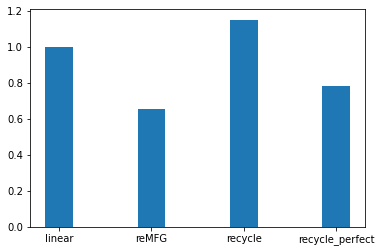

In [35]:
scennames = ['linear','reMFG','recycle','recycle_perfect']
plt.bar(scennames, e_in_norm['E_in_MWh'], width=0.3)

#Can I sort these to make it pretty?

### E_out
A calculation of E out is included in the calculateEnergyFlows function.

In [36]:
e_out_func = r1_e_linear_cum['perovskite_linear']['e_out_annual_[Wh]']
#Note that because deployment and lifetimes are identical, the energy generated is identical

## EROI

In [37]:
#EROI = Eout/Ein (note this is not a true eroi because it is missing embedded energy of process materials)
eroi = e_out_func/e_in
eroi.columns = ['EROI']
eroi

,EROI
perovskite_linear,68.208147
perovskite_reMFG,104.054366
perovskite_recycle,59.292561
perovskite_recycle_perfect,87.370239


Can I weight/attribute the EROI by the glass component? mass-wise or energy-wise?

Can I normalize to linear, and then do a relative improvement, since the absolute number doesn't yet account for all the other stuff, but the other layers/materials should be proportional between pathways??

In [38]:
#normalize "EROI"
eroi/eroi.iloc[0]

,EROI
perovskite_linear,1.000000
perovskite_reMFG,1.525542
perovskite_recycle,0.869289
perovskite_recycle_perfect,1.280936


In [39]:
#Weight eroi by mass
(e_out_func*0.76)/e_in # mass of glass in c-si
#same as eroi*0.76

,E_in_MWh
perovskite_linear,51.838192
perovskite_reMFG,79.081318
perovskite_recycle,45.062346
perovskite_recycle_perfect,66.401381


In [40]:
#weight eroi by ped/ced/embedded in pv
eroi*

SyntaxError: invalid syntax (600774251.py, line 2)

In [ ]:
plt.plot(active_Wh/1000, label = 'Energy generated [kWh]')
plt.plot(energy_annual['perovskite_linear']['mat_MFG_virgin'], label='perovskite_linear mod mfg [kWh]')
plt.plot(energy_annual['perovskite_reMFG']['mat_MFG_virgin'], label='perovskite_reMFG mod mfg [kWh]')
plt.plot(energy_annual['perovskite_recycle']['mat_MFG_virgin'], label='perovskite_recycle mod mfg [kWh]')
plt.plot(energy_annual['perovskite_recycle_perfect']['mat_MFG_virgin'], label='perovskite_recycle mod mfg [kWh]')
plt.legend()

# Calculations for file prep (module and glass)

### Module
We are doing a case study comparing recycling versus remanufacturing the glass for a perovskite module. The assumption is that the perovskite module lasts for 15 years, with weibull parameters that fail 10% of the modules before year 15, and a power degradation such that the module is at 80% of nameplate power at year 15. See the Lifetime vs Recycling journal for calculation of weibull parameters and degradation rates.

### Glass
The assumption is that a perovskite module will be a glass-glass package. Modern c-Si glass-glass (35% marketshare) bifacial modules (27% marketshare) are most likely 2.5mm front glass (28% marketshare) and 2.5 mm back glass (95% marketshare) [ITRPV 2022]. Therefore, we will assume a perovskite glass glass module will use 2 sheets of glass that are 2.5 mm thick.


In [ ]:
density_glass = 2500*1000 # g/m^3    
glass_thickness = 2.5/1e3 #m
mass_glass = 2*glass_thickness*density_glass
print('The mass of glass per module area for a perovskite glass-glass package is assumed to be '+
     str(mass_glass) + ' g/m^2.')

## Energy flows (module and glass)

### Module
We will assume that a perovskite module is disassemble-able or openable with either a laser applied to a vacuum edge seal OR with a hot knife. Laser edge seal can be done with a 16 W laser. 

The hot knife procedure with EVA heats the blade to 300 C (https://www.npcgroup.net/eng/solarpower/reuse-recycle/dismantling#comp) and is currently only used on glass-backsheet modules. The NPC website indicates that cycle time is 60 seconds for one 6x10 cell module. Small commercially availble hot knives can achieve greater than 300C drawing less than 150W. We will assume worst case scenario; hot knife for 60 seconds at 150 W

In [ ]:
e_hotknife_tot = 150*60*(1/3600)#*(1/1000) # 150 W * 60 s = W*s *(hr/s)*(kW/W)
area_mod = 1.090*2.100 #m
e_hotknife = e_hotknife_tot/area_mod # E/module to E/m2
print('Energy for hot knife separation is '+ str(round(e_hotknife, 4))+' kWh/m2. This will be used as energy of module reMFG Disassembly')

### Glass
The process to remove the perovskite from the glass is relatively simple regardless of architecture (all back contact or stack). A dunk in a water-based solvent at room temperature can remove the perovskite layer, and simple heating/baking or UV+Ozone steps should round out the cleaning preparation for a new perovskite deposition. 

Using Rodriguez-Garcia G, Aydin E, De Wolf S, Carlson B, Kellar J, Celik I. Life Cycle Assessment of Coated-Glass Recovery from Perovskite Solar Cells. ACS Sustainable Chem Eng [Internet]. 2021 Nov 3 [cited 2021 Nov 8]; Available from: https://doi.org/10.1021/acssuschemeng.1c05029, we will assume a room temperature water bath with sonication, a heating/drying/baking step, and a UV+Ozone step.


In [ ]:
e_sonicate = 4  #kWh/m2 ultrasonication
e_uvozone = 3.57  #kWh/m2 ozone+UV
e_bake = 0.06  #kWh/m2 hot plate drying
e_glassreMFG_area = e_sonicate+e_uvozone+e_bake
e_glass_reMFG_mass = e_glassreMFG_area/(mass_glass/1000) #kWh/m2 *m2/g

print('Energy to remanufacture the glass (material energy only) is ' + str(round(e_glass_reMFG_mass, 2)) + 'kWh/kg')



## Modify Solar Futures Deployment Curve

ReEDS deployment curve for solar futures is a complex deployment, which will obfuscate the results of our energy flows. To mitage that, we will develop an exponential decay deployment curve to meet the targets as layed out by Solar Futures, namely, 1.6 TW in 2050. If we can also hit 1.0 TW in 2035, that is bonus

In [ ]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


In [ ]:
#generate a dataset for deployment between 2023 and 2050
deployed_2022 =  100000# y value in MW of already deployed PV
x_vals = pd.Series(range(2021,2051)) # x values

#exponential decay function
y_dummy = power_law(x_vals-2021, deployed_2022, 0.85) 
#play around with the exponential until y_dummy[31] hits 1.7 TW (DC)

print(str(y_dummy[14]/1e6) + ' TW in 2035')
print(str(y_dummy[29]/1e6) + ' TW in 2050')
plt.plot(y_dummy)

In [ ]:
#dataframe the cumulative deployements
deployments = pd.DataFrame()
deployments['CumulativeDeploy[MW]'] = y_dummy
deployments.index = x_vals

In [ ]:
#take the annual difference to de-cumulate
deployments['AnnualDeploy[MW]'] = deployments['CumulativeDeploy[MW]']-deployments['CumulativeDeploy[MW]'].shift(1).fillna(0)
plt.plot(deployments)
plt.legend(deployments.columns)

In [ ]:
plt.plot(deployments['AnnualDeploy[MW]'])
plt.title('Annual Deployments Meeting 1.7 TW in 2050')
plt.ylabel('Annual Deploy [MW]')

In [ ]:
reversedeploy = deployments['AnnualDeploy[MW]'].iloc[::-1] #save off reverse deploy as series
reversedeploy.index = deployments.index #reapply the index to put back into df
deployments['AnnualDeploy_rev[MW]'] = reversedeploy #add to df
deployments['CumulativeReverse[MW]'] = deployments['AnnualDeploy_rev[MW]'].cumsum()

In [ ]:
print(str(deployments['CumulativeReverse[MW]'][2035]/1e6) + ' TW in 2035')
print(str(deployments['CumulativeReverse[MW]'][2050]/1e6) + ' TW in 2055')

In [ ]:
plt.plot(deployments['AnnualDeploy_rev[MW]'])
plt.title('Annual Deployments Meeting 1.7 TW in 2050')
plt.ylabel('Annual Deploy [MW]')

In [ ]:
deployments.to_csv('alternatedeployment.csv')